# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

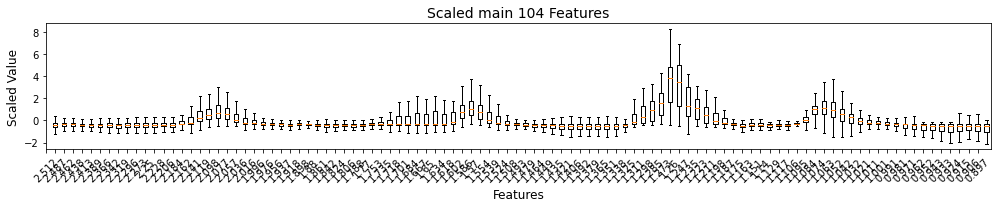

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

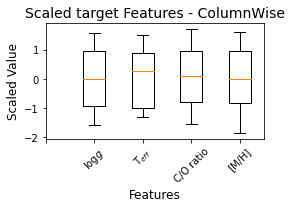

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

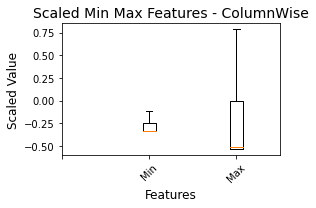

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:21 - loss: 1.8412 - gravity_loss: 0.4700 - c_o_ratio_loss: 0.4634 - metallicity_loss: 0.4606 - temperature_loss: 0.4473 - gravity_mae: 0.8717 - c_o_ratio_mae: 0.8812 - metallicity_mae: 0.8538 - temperature_mae: 0.8460

 2/13 [===>..........................] - ETA: 40s - loss: 1.8449 - gravity_loss: 0.4745 - c_o_ratio_loss: 0.4710 - metallicity_loss: 0.4548 - temperature_loss: 0.4446 - gravity_mae: 0.8775 - c_o_ratio_mae: 0.8912 - metallicity_mae: 0.8480 - temperature_mae: 0.8420 

 3/13 [=====>........................] - ETA: 37s - loss: 1.8266 - gravity_loss: 0.4683 - c_o_ratio_loss: 0.4696 - metallicity_loss: 0.4514 - temperature_loss: 0.4373 - gravity_mae: 0.8703 - c_o_ratio_mae: 0.8907 - metallicity_mae: 0.8434 - temperature_mae: 0.8330

 4/13 [========>.....................] - ETA: 34s - loss: 1.7995 - gravity_loss: 0.4650 - c_o_ratio_loss: 0.4663 - metallicity_loss: 0.4493 - temperature_loss: 0.4190 - gravity_mae: 0.8666 - c_o_ratio_mae: 0.8858 - metallicity_mae: 0.8414 - temperature_mae: 0.8096

 5/13 [==========>...................] - ETA: 30s - loss: 1.7575 - gravity_loss: 0.4647 - c_o_ratio_loss: 0.4621 - metallicity_loss: 0.4416 - temperature_loss: 0.3892 - gravity_mae: 0.8671 - c_o_ratio_mae: 0.8809 - metallicity_mae: 0.8328 - temperature_mae: 0.7711

 6/13 [============>.................] - ETA: 27s - loss: 1.6932 - gravity_loss: 0.4595 - c_o_ratio_loss: 0.4577 - metallicity_loss: 0.4289 - temperature_loss: 0.3471 - gravity_mae: 0.8613 - c_o_ratio_mae: 0.8749 - metallicity_mae: 0.8181 - temperature_mae: 0.7139

 7/13 [===============>..............] - ETA: 23s - loss: 1.6412 - gravity_loss: 0.4567 - c_o_ratio_loss: 0.4541 - metallicity_loss: 0.4162 - temperature_loss: 0.3142 - gravity_mae: 0.8585 - c_o_ratio_mae: 0.8685 - metallicity_mae: 0.8016 - temperature_mae: 0.6696

 8/13 [=================>............] - ETA: 19s - loss: 1.6572 - gravity_loss: 0.4531 - c_o_ratio_loss: 0.4529 - metallicity_loss: 0.4054 - temperature_loss: 0.3458 - gravity_mae: 0.8543 - c_o_ratio_mae: 0.8666 - metallicity_mae: 0.7876 - temperature_mae: 0.7145

 9/13 [===================>..........] - ETA: 15s - loss: 1.6021 - gravity_loss: 0.4476 - c_o_ratio_loss: 0.4495 - metallicity_loss: 0.3897 - temperature_loss: 0.3152 - gravity_mae: 0.8479 - c_o_ratio_mae: 0.8618 - metallicity_mae: 0.7675 - temperature_mae: 0.6696

10/13 [======================>.......] - ETA: 11s - loss: 1.5771 - gravity_loss: 0.4436 - c_o_ratio_loss: 0.4473 - metallicity_loss: 0.3778 - temperature_loss: 0.3084 - gravity_mae: 0.8429 - c_o_ratio_mae: 0.8590 - metallicity_mae: 0.7520 - temperature_mae: 0.6678

11/13 [========================>.....] - ETA: 7s - loss: 1.5420 - gravity_loss: 0.4391 - c_o_ratio_loss: 0.4443 - metallicity_loss: 0.3674 - temperature_loss: 0.2912 - gravity_mae: 0.8375 - c_o_ratio_mae: 0.8549 - metallicity_mae: 0.7382 - temperature_mae: 0.6453 

12/13 [==========================>...] - ETA: 4s - loss: 1.5078 - gravity_loss: 0.4355 - c_o_ratio_loss: 0.4407 - metallicity_loss: 0.3569 - temperature_loss: 0.2746 - gravity_mae: 0.8332 - c_o_ratio_mae: 0.8503 - metallicity_mae: 0.7245 - temperature_mae: 0.6205

13/13 [==============================] - ETA: 0s - loss: 1.5023 - gravity_loss: 0.4349 - c_o_ratio_loss: 0.4399 - metallicity_loss: 0.3553 - temperature_loss: 0.2722 - gravity_mae: 0.8325 - c_o_ratio_mae: 0.8494 - metallicity_mae: 0.7223 - temperature_mae: 0.6174

13/13 [==============================] - 54s 4s/step - loss: 1.5023 - gravity_loss: 0.4349 - c_o_ratio_loss: 0.4399 - metallicity_loss: 0.3553 - temperature_loss: 0.2722 - gravity_mae: 0.8325 - c_o_ratio_mae: 0.8494 - metallicity_mae: 0.7223 - temperature_mae: 0.6174 - val_loss: 1.1456 - val_gravity_loss: 0.3972 - val_c_o_ratio_loss: 0.3718 - val_metallicity_loss: 0.2562 - val_temperature_loss: 0.1204 - val_gravity_mae: 0.7851 - val_c_o_ratio_mae: 0.7654 - val_metallicity_mae: 0.5831 - val_temperature_mae: 0.4125


Epoch 2/4


 1/13 [=>............................] - ETA: 56s - loss: 1.1830 - gravity_loss: 0.3904 - c_o_ratio_loss: 0.3966 - metallicity_loss: 0.2535 - temperature_loss: 0.1425 - gravity_mae: 0.7738 - c_o_ratio_mae: 0.7976 - metallicity_mae: 0.5901 - temperature_mae: 0.4475

 2/13 [===>..........................] - ETA: 43s - loss: 1.1802 - gravity_loss: 0.3945 - c_o_ratio_loss: 0.3977 - metallicity_loss: 0.2530 - temperature_loss: 0.1349 - gravity_mae: 0.7820 - c_o_ratio_mae: 0.7952 - metallicity_mae: 0.5884 - temperature_mae: 0.4350

 3/13 [=====>........................] - ETA: 41s - loss: 1.1375 - gravity_loss: 0.3887 - c_o_ratio_loss: 0.3862 - metallicity_loss: 0.2434 - temperature_loss: 0.1190 - gravity_mae: 0.7739 - c_o_ratio_mae: 0.7766 - metallicity_mae: 0.5738 - temperature_mae: 0.4051

 4/13 [========>.....................] - ETA: 38s - loss: 1.0995 - gravity_loss: 0.3823 - c_o_ratio_loss: 0.3740 - metallicity_loss: 0.2373 - temperature_loss: 0.1059 - gravity_mae: 0.7661 - c_o_ratio_mae: 0.7600 - metallicity_mae: 0.5635 - temperature_mae: 0.3777

 5/13 [==========>...................] - ETA: 36s - loss: 1.0629 - gravity_loss: 0.3798 - c_o_ratio_loss: 0.3570 - metallicity_loss: 0.2307 - temperature_loss: 0.0955 - gravity_mae: 0.7624 - c_o_ratio_mae: 0.7373 - metallicity_mae: 0.5549 - temperature_mae: 0.3542

 6/13 [============>.................] - ETA: 33s - loss: 1.0316 - gravity_loss: 0.3728 - c_o_ratio_loss: 0.3452 - metallicity_loss: 0.2249 - temperature_loss: 0.0887 - gravity_mae: 0.7534 - c_o_ratio_mae: 0.7215 - metallicity_mae: 0.5476 - temperature_mae: 0.3397

 7/13 [===============>..............] - ETA: 29s - loss: 1.0050 - gravity_loss: 0.3672 - c_o_ratio_loss: 0.3334 - metallicity_loss: 0.2206 - temperature_loss: 0.0839 - gravity_mae: 0.7466 - c_o_ratio_mae: 0.7053 - metallicity_mae: 0.5420 - temperature_mae: 0.3292

 8/13 [=================>............] - ETA: 25s - loss: 0.9822 - gravity_loss: 0.3617 - c_o_ratio_loss: 0.3206 - metallicity_loss: 0.2192 - temperature_loss: 0.0807 - gravity_mae: 0.7398 - c_o_ratio_mae: 0.6863 - metallicity_mae: 0.5398 - temperature_mae: 0.3229

 9/13 [===================>..........] - ETA: 21s - loss: 0.9633 - gravity_loss: 0.3593 - c_o_ratio_loss: 0.3102 - metallicity_loss: 0.2156 - temperature_loss: 0.0782 - gravity_mae: 0.7359 - c_o_ratio_mae: 0.6714 - metallicity_mae: 0.5359 - temperature_mae: 0.3177

10/13 [======================>.......] - ETA: 16s - loss: 0.9512 - gravity_loss: 0.3561 - c_o_ratio_loss: 0.3021 - metallicity_loss: 0.2143 - temperature_loss: 0.0788 - gravity_mae: 0.7315 - c_o_ratio_mae: 0.6601 - metallicity_mae: 0.5346 - temperature_mae: 0.3192

11/13 [========================>.....] - ETA: 11s - loss: 0.9365 - gravity_loss: 0.3531 - c_o_ratio_loss: 0.2950 - metallicity_loss: 0.2114 - temperature_loss: 0.0770 - gravity_mae: 0.7270 - c_o_ratio_mae: 0.6494 - metallicity_mae: 0.5310 - temperature_mae: 0.3157

12/13 [==========================>...] - ETA: 5s - loss: 0.9192 - gravity_loss: 0.3505 - c_o_ratio_loss: 0.2860 - metallicity_loss: 0.2091 - temperature_loss: 0.0736 - gravity_mae: 0.7233 - c_o_ratio_mae: 0.6362 - metallicity_mae: 0.5277 - temperature_mae: 0.3073 

13/13 [==============================] - ETA: 0s - loss: 0.9157 - gravity_loss: 0.3500 - c_o_ratio_loss: 0.2842 - metallicity_loss: 0.2087 - temperature_loss: 0.0728 - gravity_mae: 0.7226 - c_o_ratio_mae: 0.6336 - metallicity_mae: 0.5274 - temperature_mae: 0.3054

13/13 [==============================] - 69s 5s/step - loss: 0.9157 - gravity_loss: 0.3500 - c_o_ratio_loss: 0.2842 - metallicity_loss: 0.2087 - temperature_loss: 0.0728 - gravity_mae: 0.7226 - c_o_ratio_mae: 0.6336 - metallicity_mae: 0.5274 - temperature_mae: 0.3054 - val_loss: 0.6647 - val_gravity_loss: 0.3021 - val_c_o_ratio_loss: 0.1554 - val_metallicity_loss: 0.1656 - val_temperature_loss: 0.0417 - val_gravity_mae: 0.6589 - val_c_o_ratio_mae: 0.4386 - val_metallicity_mae: 0.4666 - val_temperature_mae: 0.2321


Epoch 3/4


 1/13 [=>............................] - ETA: 52s - loss: 0.6809 - gravity_loss: 0.3023 - c_o_ratio_loss: 0.1725 - metallicity_loss: 0.1614 - temperature_loss: 0.0446 - gravity_mae: 0.6608 - c_o_ratio_mae: 0.4748 - metallicity_mae: 0.4615 - temperature_mae: 0.2367

 2/13 [===>..........................] - ETA: 48s - loss: 0.6944 - gravity_loss: 0.3082 - c_o_ratio_loss: 0.1677 - metallicity_loss: 0.1749 - temperature_loss: 0.0436 - gravity_mae: 0.6684 - c_o_ratio_mae: 0.4680 - metallicity_mae: 0.4795 - temperature_mae: 0.2330

 3/13 [=====>........................] - ETA: 46s - loss: 0.6820 - gravity_loss: 0.3050 - c_o_ratio_loss: 0.1605 - metallicity_loss: 0.1748 - temperature_loss: 0.0418 - gravity_mae: 0.6618 - c_o_ratio_mae: 0.4586 - metallicity_mae: 0.4786 - temperature_mae: 0.2262

 4/13 [========>.....................] - ETA: 42s - loss: 0.6772 - gravity_loss: 0.3048 - c_o_ratio_loss: 0.1580 - metallicity_loss: 0.1748 - temperature_loss: 0.0396 - gravity_mae: 0.6602 - c_o_ratio_mae: 0.4557 - metallicity_mae: 0.4802 - temperature_mae: 0.2203

 5/13 [==========>...................] - ETA: 39s - loss: 0.6831 - gravity_loss: 0.3073 - c_o_ratio_loss: 0.1622 - metallicity_loss: 0.1757 - temperature_loss: 0.0379 - gravity_mae: 0.6625 - c_o_ratio_mae: 0.4592 - metallicity_mae: 0.4823 - temperature_mae: 0.2165

 6/13 [============>.................] - ETA: 34s - loss: 0.6873 - gravity_loss: 0.3101 - c_o_ratio_loss: 0.1653 - metallicity_loss: 0.1749 - temperature_loss: 0.0370 - gravity_mae: 0.6643 - c_o_ratio_mae: 0.4631 - metallicity_mae: 0.4810 - temperature_mae: 0.2140

 7/13 [===============>..............] - ETA: 29s - loss: 0.6797 - gravity_loss: 0.3079 - c_o_ratio_loss: 0.1633 - metallicity_loss: 0.1731 - temperature_loss: 0.0353 - gravity_mae: 0.6616 - c_o_ratio_mae: 0.4579 - metallicity_mae: 0.4785 - temperature_mae: 0.2087

 8/13 [=================>............] - ETA: 24s - loss: 0.6772 - gravity_loss: 0.3087 - c_o_ratio_loss: 0.1612 - metallicity_loss: 0.1735 - temperature_loss: 0.0339 - gravity_mae: 0.6629 - c_o_ratio_mae: 0.4524 - metallicity_mae: 0.4790 - temperature_mae: 0.2040

 9/13 [===================>..........] - ETA: 19s - loss: 0.6746 - gravity_loss: 0.3091 - c_o_ratio_loss: 0.1596 - metallicity_loss: 0.1731 - temperature_loss: 0.0327 - gravity_mae: 0.6632 - c_o_ratio_mae: 0.4507 - metallicity_mae: 0.4784 - temperature_mae: 0.2005

10/13 [======================>.......] - ETA: 14s - loss: 0.6697 - gravity_loss: 0.3094 - c_o_ratio_loss: 0.1555 - metallicity_loss: 0.1730 - temperature_loss: 0.0318 - gravity_mae: 0.6634 - c_o_ratio_mae: 0.4428 - metallicity_mae: 0.4777 - temperature_mae: 0.1975

11/13 [========================>.....] - ETA: 9s - loss: 0.6646 - gravity_loss: 0.3090 - c_o_ratio_loss: 0.1519 - metallicity_loss: 0.1723 - temperature_loss: 0.0313 - gravity_mae: 0.6634 - c_o_ratio_mae: 0.4363 - metallicity_mae: 0.4768 - temperature_mae: 0.1961 

12/13 [==========================>...] - ETA: 4s - loss: 0.6591 - gravity_loss: 0.3080 - c_o_ratio_loss: 0.1496 - metallicity_loss: 0.1712 - temperature_loss: 0.0303 - gravity_mae: 0.6625 - c_o_ratio_mae: 0.4330 - metallicity_mae: 0.4747 - temperature_mae: 0.1927

13/13 [==============================] - ETA: 0s - loss: 0.6568 - gravity_loss: 0.3072 - c_o_ratio_loss: 0.1489 - metallicity_loss: 0.1705 - temperature_loss: 0.0301 - gravity_mae: 0.6614 - c_o_ratio_mae: 0.4317 - metallicity_mae: 0.4736 - temperature_mae: 0.1921

13/13 [==============================] - 63s 5s/step - loss: 0.6568 - gravity_loss: 0.3072 - c_o_ratio_loss: 0.1489 - metallicity_loss: 0.1705 - temperature_loss: 0.0301 - gravity_mae: 0.6614 - c_o_ratio_mae: 0.4317 - metallicity_mae: 0.4736 - temperature_mae: 0.1921 - val_loss: 0.5718 - val_gravity_loss: 0.2813 - val_c_o_ratio_loss: 0.1155 - val_metallicity_loss: 0.1588 - val_temperature_loss: 0.0163 - val_gravity_mae: 0.6287 - val_c_o_ratio_mae: 0.3727 - val_metallicity_mae: 0.4563 - val_temperature_mae: 0.1396


Epoch 4/4


 1/13 [=>............................] - ETA: 55s - loss: 0.5960 - gravity_loss: 0.2977 - c_o_ratio_loss: 0.1156 - metallicity_loss: 0.1633 - temperature_loss: 0.0193 - gravity_mae: 0.6470 - c_o_ratio_mae: 0.3744 - metallicity_mae: 0.4613 - temperature_mae: 0.1493

 2/13 [===>..........................] - ETA: 57s - loss: 0.5839 - gravity_loss: 0.2943 - c_o_ratio_loss: 0.1108 - metallicity_loss: 0.1602 - temperature_loss: 0.0186 - gravity_mae: 0.6440 - c_o_ratio_mae: 0.3676 - metallicity_mae: 0.4588 - temperature_mae: 0.1480

 3/13 [=====>........................] - ETA: 50s - loss: 0.5748 - gravity_loss: 0.2906 - c_o_ratio_loss: 0.1077 - metallicity_loss: 0.1574 - temperature_loss: 0.0192 - gravity_mae: 0.6382 - c_o_ratio_mae: 0.3633 - metallicity_mae: 0.4528 - temperature_mae: 0.1511

 4/13 [========>.....................] - ETA: 46s - loss: 0.5683 - gravity_loss: 0.2872 - c_o_ratio_loss: 0.1055 - metallicity_loss: 0.1571 - temperature_loss: 0.0186 - gravity_mae: 0.6336 - c_o_ratio_mae: 0.3597 - metallicity_mae: 0.4516 - temperature_mae: 0.1479

 5/13 [==========>...................] - ETA: 40s - loss: 0.5678 - gravity_loss: 0.2880 - c_o_ratio_loss: 0.1032 - metallicity_loss: 0.1576 - temperature_loss: 0.0189 - gravity_mae: 0.6356 - c_o_ratio_mae: 0.3542 - metallicity_mae: 0.4523 - temperature_mae: 0.1488

 6/13 [============>.................] - ETA: 35s - loss: 0.5636 - gravity_loss: 0.2860 - c_o_ratio_loss: 0.1018 - metallicity_loss: 0.1574 - temperature_loss: 0.0184 - gravity_mae: 0.6319 - c_o_ratio_mae: 0.3515 - metallicity_mae: 0.4517 - temperature_mae: 0.1465

 7/13 [===============>..............] - ETA: 30s - loss: 0.5611 - gravity_loss: 0.2851 - c_o_ratio_loss: 0.1006 - metallicity_loss: 0.1575 - temperature_loss: 0.0178 - gravity_mae: 0.6301 - c_o_ratio_mae: 0.3482 - metallicity_mae: 0.4514 - temperature_mae: 0.1446

 8/13 [=================>............] - ETA: 25s - loss: 0.5574 - gravity_loss: 0.2832 - c_o_ratio_loss: 0.1000 - metallicity_loss: 0.1568 - temperature_loss: 0.0174 - gravity_mae: 0.6279 - c_o_ratio_mae: 0.3475 - metallicity_mae: 0.4510 - temperature_mae: 0.1430

 9/13 [===================>..........] - ETA: 19s - loss: 0.5563 - gravity_loss: 0.2825 - c_o_ratio_loss: 0.1001 - metallicity_loss: 0.1566 - temperature_loss: 0.0172 - gravity_mae: 0.6269 - c_o_ratio_mae: 0.3468 - metallicity_mae: 0.4505 - temperature_mae: 0.1423

10/13 [======================>.......] - ETA: 14s - loss: 0.5551 - gravity_loss: 0.2833 - c_o_ratio_loss: 0.0984 - metallicity_loss: 0.1563 - temperature_loss: 0.0171 - gravity_mae: 0.6279 - c_o_ratio_mae: 0.3436 - metallicity_mae: 0.4505 - temperature_mae: 0.1421

11/13 [========================>.....] - ETA: 9s - loss: 0.5517 - gravity_loss: 0.2822 - c_o_ratio_loss: 0.0969 - metallicity_loss: 0.1558 - temperature_loss: 0.0168 - gravity_mae: 0.6261 - c_o_ratio_mae: 0.3409 - metallicity_mae: 0.4497 - temperature_mae: 0.1413 

12/13 [==========================>...] - ETA: 5s - loss: 0.5489 - gravity_loss: 0.2809 - c_o_ratio_loss: 0.0963 - metallicity_loss: 0.1551 - temperature_loss: 0.0166 - gravity_mae: 0.6245 - c_o_ratio_mae: 0.3391 - metallicity_mae: 0.4492 - temperature_mae: 0.1403

13/13 [==============================] - ETA: 0s - loss: 0.5482 - gravity_loss: 0.2807 - c_o_ratio_loss: 0.0960 - metallicity_loss: 0.1549 - temperature_loss: 0.0166 - gravity_mae: 0.6241 - c_o_ratio_mae: 0.3384 - metallicity_mae: 0.4489 - temperature_mae: 0.1402

13/13 [==============================] - 64s 5s/step - loss: 0.5482 - gravity_loss: 0.2807 - c_o_ratio_loss: 0.0960 - metallicity_loss: 0.1549 - temperature_loss: 0.0166 - gravity_mae: 0.6241 - c_o_ratio_mae: 0.3384 - metallicity_mae: 0.4489 - temperature_mae: 0.1402 - val_loss: 0.4721 - val_gravity_loss: 0.2473 - val_c_o_ratio_loss: 0.0719 - val_metallicity_loss: 0.1412 - val_temperature_loss: 0.0116 - val_gravity_mae: 0.5721 - val_c_o_ratio_mae: 0.2845 - val_metallicity_mae: 0.4291 - val_temperature_mae: 0.1218


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 3:29

  2/782 [..............................] - ETA: 44s 

  3/782 [..............................] - ETA: 45s

  4/782 [..............................] - ETA: 45s

  5/782 [..............................] - ETA: 45s

  6/782 [..............................] - ETA: 44s

  7/782 [..............................] - ETA: 44s

  8/782 [..............................] - ETA: 44s

  9/782 [..............................] - ETA: 44s

 10/782 [..............................] - ETA: 44s

 11/782 [..............................] - ETA: 44s

 12/782 [..............................] - ETA: 45s

 13/782 [..............................] - ETA: 44s

 14/782 [..............................] - ETA: 44s

 15/782 [..............................] - ETA: 44s

 16/782 [..............................] - ETA: 45s

 17/782 [..............................] - ETA: 44s

 18/782 [..............................] - ETA: 44s

 19/782 [..............................] - ETA: 44s

 20/782 [..............................] - ETA: 45s

 21/782 [..............................] - ETA: 45s

 22/782 [..............................] - ETA: 45s

 23/782 [..............................] - ETA: 45s

 24/782 [..............................] - ETA: 46s

 25/782 [..............................] - ETA: 46s

 26/782 [..............................] - ETA: 46s

 27/782 [>.............................] - ETA: 45s

 28/782 [>.............................] - ETA: 45s

 29/782 [>.............................] - ETA: 45s

 30/782 [>.............................] - ETA: 45s

 31/782 [>.............................] - ETA: 45s

 32/782 [>.............................] - ETA: 45s

 33/782 [>.............................] - ETA: 45s

 34/782 [>.............................] - ETA: 44s

 35/782 [>.............................] - ETA: 44s

 36/782 [>.............................] - ETA: 44s

 37/782 [>.............................] - ETA: 44s

 38/782 [>.............................] - ETA: 44s

 39/782 [>.............................] - ETA: 44s

 40/782 [>.............................] - ETA: 44s

 41/782 [>.............................] - ETA: 44s

 42/782 [>.............................] - ETA: 44s

 43/782 [>.............................] - ETA: 44s

 44/782 [>.............................] - ETA: 44s

 45/782 [>.............................] - ETA: 44s

 46/782 [>.............................] - ETA: 44s

 47/782 [>.............................] - ETA: 44s

 48/782 [>.............................] - ETA: 44s

 49/782 [>.............................] - ETA: 44s

 50/782 [>.............................] - ETA: 44s

 51/782 [>.............................] - ETA: 45s

 52/782 [>.............................] - ETA: 45s

 53/782 [=>............................] - ETA: 45s

 54/782 [=>............................] - ETA: 45s

 55/782 [=>............................] - ETA: 44s

 56/782 [=>............................] - ETA: 44s

 57/782 [=>............................] - ETA: 44s

 58/782 [=>............................] - ETA: 44s

 59/782 [=>............................] - ETA: 44s

 60/782 [=>............................] - ETA: 44s

 61/782 [=>............................] - ETA: 44s

 62/782 [=>............................] - ETA: 44s

 63/782 [=>............................] - ETA: 43s

 64/782 [=>............................] - ETA: 43s

 65/782 [=>............................] - ETA: 43s

 66/782 [=>............................] - ETA: 43s

 67/782 [=>............................] - ETA: 43s

 68/782 [=>............................] - ETA: 43s

 69/782 [=>............................] - ETA: 43s

 70/782 [=>............................] - ETA: 43s

 71/782 [=>............................] - ETA: 43s

 72/782 [=>............................] - ETA: 43s

 73/782 [=>............................] - ETA: 43s

 74/782 [=>............................] - ETA: 42s

 75/782 [=>............................] - ETA: 42s

 76/782 [=>............................] - ETA: 42s

 77/782 [=>............................] - ETA: 42s

 78/782 [=>............................] - ETA: 42s

 79/782 [==>...........................] - ETA: 42s

 80/782 [==>...........................] - ETA: 42s

 81/782 [==>...........................] - ETA: 42s

 82/782 [==>...........................] - ETA: 42s

 83/782 [==>...........................] - ETA: 42s

 84/782 [==>...........................] - ETA: 42s

 85/782 [==>...........................] - ETA: 42s

 86/782 [==>...........................] - ETA: 42s

 87/782 [==>...........................] - ETA: 42s

 88/782 [==>...........................] - ETA: 42s

 89/782 [==>...........................] - ETA: 42s

 90/782 [==>...........................] - ETA: 42s

 91/782 [==>...........................] - ETA: 42s

 92/782 [==>...........................] - ETA: 42s

 93/782 [==>...........................] - ETA: 42s

 94/782 [==>...........................] - ETA: 42s

 95/782 [==>...........................] - ETA: 42s

 96/782 [==>...........................] - ETA: 41s

 97/782 [==>...........................] - ETA: 41s

 98/782 [==>...........................] - ETA: 41s

 99/782 [==>...........................] - ETA: 41s

100/782 [==>...........................] - ETA: 41s

101/782 [==>...........................] - ETA: 41s

102/782 [==>...........................] - ETA: 41s

103/782 [==>...........................] - ETA: 41s

104/782 [==>...........................] - ETA: 41s

105/782 [===>..........................] - ETA: 41s

106/782 [===>..........................] - ETA: 41s

107/782 [===>..........................] - ETA: 41s

108/782 [===>..........................] - ETA: 41s

109/782 [===>..........................] - ETA: 41s

110/782 [===>..........................] - ETA: 41s

111/782 [===>..........................] - ETA: 41s

112/782 [===>..........................] - ETA: 41s

113/782 [===>..........................] - ETA: 41s

114/782 [===>..........................] - ETA: 41s

115/782 [===>..........................] - ETA: 41s

116/782 [===>..........................] - ETA: 41s

117/782 [===>..........................] - ETA: 41s

118/782 [===>..........................] - ETA: 41s

119/782 [===>..........................] - ETA: 40s

120/782 [===>..........................] - ETA: 40s

121/782 [===>..........................] - ETA: 40s

122/782 [===>..........................] - ETA: 40s

123/782 [===>..........................] - ETA: 40s

124/782 [===>..........................] - ETA: 40s

125/782 [===>..........................] - ETA: 40s

126/782 [===>..........................] - ETA: 40s

127/782 [===>..........................] - ETA: 40s

128/782 [===>..........................] - ETA: 40s

129/782 [===>..........................] - ETA: 40s

130/782 [===>..........................] - ETA: 39s

131/782 [====>.........................] - ETA: 39s

132/782 [====>.........................] - ETA: 39s

133/782 [====>.........................] - ETA: 39s

134/782 [====>.........................] - ETA: 39s

135/782 [====>.........................] - ETA: 39s

136/782 [====>.........................] - ETA: 39s

137/782 [====>.........................] - ETA: 39s

138/782 [====>.........................] - ETA: 39s

139/782 [====>.........................] - ETA: 39s

140/782 [====>.........................] - ETA: 39s

141/782 [====>.........................] - ETA: 39s

142/782 [====>.........................] - ETA: 39s

143/782 [====>.........................] - ETA: 38s

144/782 [====>.........................] - ETA: 38s

145/782 [====>.........................] - ETA: 38s

146/782 [====>.........................] - ETA: 38s

147/782 [====>.........................] - ETA: 38s

148/782 [====>.........................] - ETA: 38s

149/782 [====>.........................] - ETA: 38s

150/782 [====>.........................] - ETA: 38s

151/782 [====>.........................] - ETA: 38s

152/782 [====>.........................] - ETA: 38s

153/782 [====>.........................] - ETA: 38s

154/782 [====>.........................] - ETA: 38s

155/782 [====>.........................] - ETA: 38s

156/782 [====>.........................] - ETA: 38s

157/782 [=====>........................] - ETA: 37s

158/782 [=====>........................] - ETA: 37s

159/782 [=====>........................] - ETA: 37s

160/782 [=====>........................] - ETA: 37s

161/782 [=====>........................] - ETA: 37s

162/782 [=====>........................] - ETA: 37s

163/782 [=====>........................] - ETA: 37s

164/782 [=====>........................] - ETA: 37s

165/782 [=====>........................] - ETA: 37s

166/782 [=====>........................] - ETA: 37s

167/782 [=====>........................] - ETA: 37s

168/782 [=====>........................] - ETA: 37s

169/782 [=====>........................] - ETA: 37s

170/782 [=====>........................] - ETA: 37s

171/782 [=====>........................] - ETA: 36s

172/782 [=====>........................] - ETA: 36s

173/782 [=====>........................] - ETA: 36s

174/782 [=====>........................] - ETA: 36s

175/782 [=====>........................] - ETA: 36s

176/782 [=====>........................] - ETA: 36s

177/782 [=====>........................] - ETA: 36s

178/782 [=====>........................] - ETA: 36s

179/782 [=====>........................] - ETA: 36s

180/782 [=====>........................] - ETA: 36s

181/782 [=====>........................] - ETA: 36s

183/782 [======>.......................] - ETA: 36s

184/782 [======>.......................] - ETA: 36s

185/782 [======>.......................] - ETA: 35s

186/782 [======>.......................] - ETA: 35s

187/782 [======>.......................] - ETA: 35s

188/782 [======>.......................] - ETA: 35s

189/782 [======>.......................] - ETA: 35s

190/782 [======>.......................] - ETA: 35s

191/782 [======>.......................] - ETA: 35s

192/782 [======>.......................] - ETA: 35s

193/782 [======>.......................] - ETA: 35s

194/782 [======>.......................] - ETA: 35s

195/782 [======>.......................] - ETA: 35s

196/782 [======>.......................] - ETA: 35s

197/782 [======>.......................] - ETA: 35s

198/782 [======>.......................] - ETA: 35s

199/782 [======>.......................] - ETA: 35s

200/782 [======>.......................] - ETA: 34s

201/782 [======>.......................] - ETA: 34s

202/782 [======>.......................] - ETA: 34s

203/782 [======>.......................] - ETA: 34s

204/782 [======>.......................] - ETA: 34s

205/782 [======>.......................] - ETA: 34s

206/782 [======>.......................] - ETA: 34s

207/782 [======>.......................] - ETA: 34s

208/782 [======>.......................] - ETA: 34s

209/782 [=======>......................] - ETA: 34s

210/782 [=======>......................] - ETA: 34s

211/782 [=======>......................] - ETA: 34s

212/782 [=======>......................] - ETA: 34s

213/782 [=======>......................] - ETA: 34s

214/782 [=======>......................] - ETA: 34s

215/782 [=======>......................] - ETA: 33s

216/782 [=======>......................] - ETA: 33s

217/782 [=======>......................] - ETA: 33s

218/782 [=======>......................] - ETA: 33s

219/782 [=======>......................] - ETA: 33s

220/782 [=======>......................] - ETA: 33s

221/782 [=======>......................] - ETA: 33s

222/782 [=======>......................] - ETA: 33s

223/782 [=======>......................] - ETA: 33s

224/782 [=======>......................] - ETA: 33s

225/782 [=======>......................] - ETA: 33s

226/782 [=======>......................] - ETA: 33s

227/782 [=======>......................] - ETA: 33s

228/782 [=======>......................] - ETA: 33s

229/782 [=======>......................] - ETA: 33s

230/782 [=======>......................] - ETA: 33s

231/782 [=======>......................] - ETA: 32s

232/782 [=======>......................] - ETA: 32s

233/782 [=======>......................] - ETA: 32s

234/782 [=======>......................] - ETA: 32s

235/782 [========>.....................] - ETA: 32s

236/782 [========>.....................] - ETA: 32s

237/782 [========>.....................] - ETA: 32s

238/782 [========>.....................] - ETA: 32s

239/782 [========>.....................] - ETA: 32s

240/782 [========>.....................] - ETA: 32s

241/782 [========>.....................] - ETA: 32s

242/782 [========>.....................] - ETA: 32s

243/782 [========>.....................] - ETA: 32s

244/782 [========>.....................] - ETA: 32s

245/782 [========>.....................] - ETA: 32s

246/782 [========>.....................] - ETA: 32s

247/782 [========>.....................] - ETA: 32s

248/782 [========>.....................] - ETA: 32s

249/782 [========>.....................] - ETA: 31s

250/782 [========>.....................] - ETA: 31s

251/782 [========>.....................] - ETA: 31s

252/782 [========>.....................] - ETA: 31s

253/782 [========>.....................] - ETA: 31s

254/782 [========>.....................] - ETA: 31s

255/782 [========>.....................] - ETA: 31s

256/782 [========>.....................] - ETA: 31s

257/782 [========>.....................] - ETA: 31s

258/782 [========>.....................] - ETA: 31s

259/782 [========>.....................] - ETA: 31s

260/782 [========>.....................] - ETA: 31s

261/782 [=========>....................] - ETA: 31s

262/782 [=========>....................] - ETA: 31s

263/782 [=========>....................] - ETA: 31s

264/782 [=========>....................] - ETA: 31s

265/782 [=========>....................] - ETA: 30s

266/782 [=========>....................] - ETA: 30s

267/782 [=========>....................] - ETA: 30s

268/782 [=========>....................] - ETA: 30s

269/782 [=========>....................] - ETA: 30s

270/782 [=========>....................] - ETA: 30s

271/782 [=========>....................] - ETA: 30s

272/782 [=========>....................] - ETA: 30s

273/782 [=========>....................] - ETA: 30s

274/782 [=========>....................] - ETA: 30s

275/782 [=========>....................] - ETA: 30s

276/782 [=========>....................] - ETA: 30s

277/782 [=========>....................] - ETA: 30s

278/782 [=========>....................] - ETA: 30s

279/782 [=========>....................] - ETA: 30s

280/782 [=========>....................] - ETA: 30s

281/782 [=========>....................] - ETA: 29s

282/782 [=========>....................] - ETA: 29s

283/782 [=========>....................] - ETA: 29s

284/782 [=========>....................] - ETA: 29s

285/782 [=========>....................] - ETA: 29s

286/782 [=========>....................] - ETA: 29s

287/782 [==========>...................] - ETA: 29s

288/782 [==========>...................] - ETA: 29s

289/782 [==========>...................] - ETA: 29s

290/782 [==========>...................] - ETA: 29s

291/782 [==========>...................] - ETA: 29s

292/782 [==========>...................] - ETA: 29s

293/782 [==========>...................] - ETA: 29s

294/782 [==========>...................] - ETA: 29s

295/782 [==========>...................] - ETA: 29s

296/782 [==========>...................] - ETA: 29s

297/782 [==========>...................] - ETA: 28s

298/782 [==========>...................] - ETA: 28s

299/782 [==========>...................] - ETA: 28s

300/782 [==========>...................] - ETA: 28s

301/782 [==========>...................] - ETA: 28s

302/782 [==========>...................] - ETA: 28s

303/782 [==========>...................] - ETA: 28s

305/782 [==========>...................] - ETA: 28s

306/782 [==========>...................] - ETA: 28s

307/782 [==========>...................] - ETA: 28s

308/782 [==========>...................] - ETA: 28s

309/782 [==========>...................] - ETA: 28s

310/782 [==========>...................] - ETA: 28s

311/782 [==========>...................] - ETA: 28s

312/782 [==========>...................] - ETA: 28s

313/782 [===========>..................] - ETA: 27s

314/782 [===========>..................] - ETA: 27s

315/782 [===========>..................] - ETA: 27s

316/782 [===========>..................] - ETA: 27s

317/782 [===========>..................] - ETA: 27s

318/782 [===========>..................] - ETA: 27s

319/782 [===========>..................] - ETA: 27s

320/782 [===========>..................] - ETA: 27s

321/782 [===========>..................] - ETA: 27s

322/782 [===========>..................] - ETA: 27s

323/782 [===========>..................] - ETA: 27s

324/782 [===========>..................] - ETA: 27s

325/782 [===========>..................] - ETA: 27s

326/782 [===========>..................] - ETA: 27s

327/782 [===========>..................] - ETA: 27s

328/782 [===========>..................] - ETA: 27s

329/782 [===========>..................] - ETA: 26s

330/782 [===========>..................] - ETA: 26s

331/782 [===========>..................] - ETA: 26s

332/782 [===========>..................] - ETA: 26s

333/782 [===========>..................] - ETA: 26s

334/782 [===========>..................] - ETA: 26s

335/782 [===========>..................] - ETA: 26s

336/782 [===========>..................] - ETA: 26s

337/782 [===========>..................] - ETA: 26s

338/782 [===========>..................] - ETA: 26s

339/782 [============>.................] - ETA: 26s

340/782 [============>.................] - ETA: 26s

341/782 [============>.................] - ETA: 26s

342/782 [============>.................] - ETA: 26s

343/782 [============>.................] - ETA: 26s

344/782 [============>.................] - ETA: 26s

345/782 [============>.................] - ETA: 25s

346/782 [============>.................] - ETA: 25s

347/782 [============>.................] - ETA: 25s

348/782 [============>.................] - ETA: 25s

349/782 [============>.................] - ETA: 25s

350/782 [============>.................] - ETA: 25s

351/782 [============>.................] - ETA: 25s

352/782 [============>.................] - ETA: 25s

353/782 [============>.................] - ETA: 25s

354/782 [============>.................] - ETA: 25s

355/782 [============>.................] - ETA: 25s

356/782 [============>.................] - ETA: 25s

357/782 [============>.................] - ETA: 25s

358/782 [============>.................] - ETA: 25s

359/782 [============>.................] - ETA: 25s

360/782 [============>.................] - ETA: 25s

361/782 [============>.................] - ETA: 24s

362/782 [============>.................] - ETA: 24s

363/782 [============>.................] - ETA: 24s

364/782 [============>.................] - ETA: 24s

365/782 [=============>................] - ETA: 24s

366/782 [=============>................] - ETA: 24s

367/782 [=============>................] - ETA: 24s

368/782 [=============>................] - ETA: 24s

369/782 [=============>................] - ETA: 24s

370/782 [=============>................] - ETA: 24s

371/782 [=============>................] - ETA: 24s

372/782 [=============>................] - ETA: 24s

374/782 [=============>................] - ETA: 24s

375/782 [=============>................] - ETA: 24s

376/782 [=============>................] - ETA: 24s

377/782 [=============>................] - ETA: 23s

378/782 [=============>................] - ETA: 23s

380/782 [=============>................] - ETA: 23s

381/782 [=============>................] - ETA: 23s

382/782 [=============>................] - ETA: 23s

383/782 [=============>................] - ETA: 23s

384/782 [=============>................] - ETA: 23s

385/782 [=============>................] - ETA: 23s

386/782 [=============>................] - ETA: 23s

387/782 [=============>................] - ETA: 23s

389/782 [=============>................] - ETA: 23s

390/782 [=============>................] - ETA: 23s

391/782 [==============>...............] - ETA: 23s

392/782 [==============>...............] - ETA: 23s

393/782 [==============>...............] - ETA: 22s

394/782 [==============>...............] - ETA: 22s

395/782 [==============>...............] - ETA: 22s

396/782 [==============>...............] - ETA: 22s

397/782 [==============>...............] - ETA: 22s

398/782 [==============>...............] - ETA: 22s

399/782 [==============>...............] - ETA: 22s

400/782 [==============>...............] - ETA: 22s

401/782 [==============>...............] - ETA: 22s

402/782 [==============>...............] - ETA: 22s

403/782 [==============>...............] - ETA: 22s

404/782 [==============>...............] - ETA: 22s

405/782 [==============>...............] - ETA: 22s

406/782 [==============>...............] - ETA: 22s

407/782 [==============>...............] - ETA: 22s

408/782 [==============>...............] - ETA: 22s

409/782 [==============>...............] - ETA: 22s

410/782 [==============>...............] - ETA: 21s

411/782 [==============>...............] - ETA: 21s

412/782 [==============>...............] - ETA: 21s

413/782 [==============>...............] - ETA: 21s

414/782 [==============>...............] - ETA: 21s

415/782 [==============>...............] - ETA: 21s

416/782 [==============>...............] - ETA: 21s

417/782 [==============>...............] - ETA: 21s

418/782 [===============>..............] - ETA: 21s

419/782 [===============>..............] - ETA: 21s

420/782 [===============>..............] - ETA: 21s

421/782 [===============>..............] - ETA: 21s

422/782 [===============>..............] - ETA: 21s

423/782 [===============>..............] - ETA: 21s

424/782 [===============>..............] - ETA: 21s

426/782 [===============>..............] - ETA: 20s

427/782 [===============>..............] - ETA: 20s

428/782 [===============>..............] - ETA: 20s

429/782 [===============>..............] - ETA: 20s

430/782 [===============>..............] - ETA: 20s

431/782 [===============>..............] - ETA: 20s

432/782 [===============>..............] - ETA: 20s

433/782 [===============>..............] - ETA: 20s

434/782 [===============>..............] - ETA: 20s

435/782 [===============>..............] - ETA: 20s

436/782 [===============>..............] - ETA: 20s

437/782 [===============>..............] - ETA: 20s

438/782 [===============>..............] - ETA: 20s

439/782 [===============>..............] - ETA: 20s

440/782 [===============>..............] - ETA: 20s

441/782 [===============>..............] - ETA: 20s

442/782 [===============>..............] - ETA: 20s

443/782 [===============>..............] - ETA: 19s

444/782 [================>.............] - ETA: 19s

445/782 [================>.............] - ETA: 19s

446/782 [================>.............] - ETA: 19s

447/782 [================>.............] - ETA: 19s

448/782 [================>.............] - ETA: 19s

449/782 [================>.............] - ETA: 19s

450/782 [================>.............] - ETA: 19s

451/782 [================>.............] - ETA: 19s

452/782 [================>.............] - ETA: 19s

453/782 [================>.............] - ETA: 19s

454/782 [================>.............] - ETA: 19s

455/782 [================>.............] - ETA: 19s

456/782 [================>.............] - ETA: 19s

457/782 [================>.............] - ETA: 19s

458/782 [================>.............] - ETA: 19s

459/782 [================>.............] - ETA: 19s

460/782 [================>.............] - ETA: 18s

461/782 [================>.............] - ETA: 18s

462/782 [================>.............] - ETA: 18s

463/782 [================>.............] - ETA: 18s

464/782 [================>.............] - ETA: 18s

465/782 [================>.............] - ETA: 18s

466/782 [================>.............] - ETA: 18s

467/782 [================>.............] - ETA: 18s

468/782 [================>.............] - ETA: 18s

469/782 [================>.............] - ETA: 18s

470/782 [=================>............] - ETA: 18s

471/782 [=================>............] - ETA: 18s

472/782 [=================>............] - ETA: 18s

473/782 [=================>............] - ETA: 18s

475/782 [=================>............] - ETA: 18s

476/782 [=================>............] - ETA: 18s

477/782 [=================>............] - ETA: 17s

478/782 [=================>............] - ETA: 17s

479/782 [=================>............] - ETA: 17s

480/782 [=================>............] - ETA: 17s

481/782 [=================>............] - ETA: 17s

482/782 [=================>............] - ETA: 17s

483/782 [=================>............] - ETA: 17s

484/782 [=================>............] - ETA: 17s

485/782 [=================>............] - ETA: 17s

486/782 [=================>............] - ETA: 17s

487/782 [=================>............] - ETA: 17s

488/782 [=================>............] - ETA: 17s

489/782 [=================>............] - ETA: 17s

490/782 [=================>............] - ETA: 17s

491/782 [=================>............] - ETA: 17s

492/782 [=================>............] - ETA: 17s

493/782 [=================>............] - ETA: 17s

494/782 [=================>............] - ETA: 16s

495/782 [=================>............] - ETA: 16s

496/782 [==================>...........] - ETA: 16s

497/782 [==================>...........] - ETA: 16s

498/782 [==================>...........] - ETA: 16s

499/782 [==================>...........] - ETA: 16s

500/782 [==================>...........] - ETA: 16s

501/782 [==================>...........] - ETA: 16s

502/782 [==================>...........] - ETA: 16s

503/782 [==================>...........] - ETA: 16s

504/782 [==================>...........] - ETA: 16s

505/782 [==================>...........] - ETA: 16s

506/782 [==================>...........] - ETA: 16s

507/782 [==================>...........] - ETA: 16s

508/782 [==================>...........] - ETA: 16s

509/782 [==================>...........] - ETA: 16s

510/782 [==================>...........] - ETA: 15s

511/782 [==================>...........] - ETA: 15s

512/782 [==================>...........] - ETA: 15s

513/782 [==================>...........] - ETA: 15s

514/782 [==================>...........] - ETA: 15s

515/782 [==================>...........] - ETA: 15s

516/782 [==================>...........] - ETA: 15s

517/782 [==================>...........] - ETA: 15s

518/782 [==================>...........] - ETA: 15s

519/782 [==================>...........] - ETA: 15s

520/782 [==================>...........] - ETA: 15s

521/782 [==================>...........] - ETA: 15s

522/782 [===================>..........] - ETA: 15s

523/782 [===================>..........] - ETA: 15s

524/782 [===================>..........] - ETA: 15s

525/782 [===================>..........] - ETA: 15s

526/782 [===================>..........] - ETA: 15s

527/782 [===================>..........] - ETA: 14s

528/782 [===================>..........] - ETA: 14s

529/782 [===================>..........] - ETA: 14s

530/782 [===================>..........] - ETA: 14s

531/782 [===================>..........] - ETA: 14s

532/782 [===================>..........] - ETA: 14s

533/782 [===================>..........] - ETA: 14s

534/782 [===================>..........] - ETA: 14s

535/782 [===================>..........] - ETA: 14s

536/782 [===================>..........] - ETA: 14s

537/782 [===================>..........] - ETA: 14s

538/782 [===================>..........] - ETA: 14s

539/782 [===================>..........] - ETA: 14s

540/782 [===================>..........] - ETA: 14s

541/782 [===================>..........] - ETA: 14s

542/782 [===================>..........] - ETA: 14s

543/782 [===================>..........] - ETA: 14s

544/782 [===================>..........] - ETA: 14s

545/782 [===================>..........] - ETA: 13s

546/782 [===================>..........] - ETA: 13s

547/782 [===================>..........] - ETA: 13s

548/782 [====================>.........] - ETA: 13s

549/782 [====================>.........] - ETA: 13s

550/782 [====================>.........] - ETA: 13s

551/782 [====================>.........] - ETA: 13s

552/782 [====================>.........] - ETA: 13s

553/782 [====================>.........] - ETA: 13s

554/782 [====================>.........] - ETA: 13s

555/782 [====================>.........] - ETA: 13s

556/782 [====================>.........] - ETA: 13s

557/782 [====================>.........] - ETA: 13s

558/782 [====================>.........] - ETA: 13s

559/782 [====================>.........] - ETA: 13s

560/782 [====================>.........] - ETA: 13s

561/782 [====================>.........] - ETA: 13s

562/782 [====================>.........] - ETA: 12s

563/782 [====================>.........] - ETA: 12s

564/782 [====================>.........] - ETA: 12s

565/782 [====================>.........] - ETA: 12s

566/782 [====================>.........] - ETA: 12s

567/782 [====================>.........] - ETA: 12s

568/782 [====================>.........] - ETA: 12s

569/782 [====================>.........] - ETA: 12s

570/782 [====================>.........] - ETA: 12s

571/782 [====================>.........] - ETA: 12s

572/782 [====================>.........] - ETA: 12s

573/782 [====================>.........] - ETA: 12s

574/782 [=====================>........] - ETA: 12s

575/782 [=====================>........] - ETA: 12s

576/782 [=====================>........] - ETA: 12s

577/782 [=====================>........] - ETA: 12s

578/782 [=====================>........] - ETA: 12s

579/782 [=====================>........] - ETA: 11s

580/782 [=====================>........] - ETA: 11s

581/782 [=====================>........] - ETA: 11s

582/782 [=====================>........] - ETA: 11s

583/782 [=====================>........] - ETA: 11s

584/782 [=====================>........] - ETA: 11s

585/782 [=====================>........] - ETA: 11s

586/782 [=====================>........] - ETA: 11s

587/782 [=====================>........] - ETA: 11s

588/782 [=====================>........] - ETA: 11s

589/782 [=====================>........] - ETA: 11s

590/782 [=====================>........] - ETA: 11s

591/782 [=====================>........] - ETA: 11s

592/782 [=====================>........] - ETA: 11s

593/782 [=====================>........] - ETA: 11s

594/782 [=====================>........] - ETA: 11s

595/782 [=====================>........] - ETA: 10s

596/782 [=====================>........] - ETA: 10s

597/782 [=====================>........] - ETA: 10s

598/782 [=====================>........] - ETA: 10s

599/782 [=====================>........] - ETA: 10s

600/782 [======================>.......] - ETA: 10s

601/782 [======================>.......] - ETA: 10s

602/782 [======================>.......] - ETA: 10s

603/782 [======================>.......] - ETA: 10s

604/782 [======================>.......] - ETA: 10s

605/782 [======================>.......] - ETA: 10s

606/782 [======================>.......] - ETA: 10s

607/782 [======================>.......] - ETA: 10s

608/782 [======================>.......] - ETA: 10s

609/782 [======================>.......] - ETA: 10s

610/782 [======================>.......] - ETA: 10s

611/782 [======================>.......] - ETA: 10s

612/782 [======================>.......] - ETA: 9s 

613/782 [======================>.......] - ETA: 9s

614/782 [======================>.......] - ETA: 9s

615/782 [======================>.......] - ETA: 9s

616/782 [======================>.......] - ETA: 9s

617/782 [======================>.......] - ETA: 9s

618/782 [======================>.......] - ETA: 9s

619/782 [======================>.......] - ETA: 9s

620/782 [======================>.......] - ETA: 9s

621/782 [======================>.......] - ETA: 9s

622/782 [======================>.......] - ETA: 9s

623/782 [======================>.......] - ETA: 9s

624/782 [======================>.......] - ETA: 9s

625/782 [======================>.......] - ETA: 9s

626/782 [=======================>......] - ETA: 9s

627/782 [=======================>......] - ETA: 9s

628/782 [=======================>......] - ETA: 9s

629/782 [=======================>......] - ETA: 8s

630/782 [=======================>......] - ETA: 8s

631/782 [=======================>......] - ETA: 8s

632/782 [=======================>......] - ETA: 8s

633/782 [=======================>......] - ETA: 8s

634/782 [=======================>......] - ETA: 8s

635/782 [=======================>......] - ETA: 8s

636/782 [=======================>......] - ETA: 8s

637/782 [=======================>......] - ETA: 8s

638/782 [=======================>......] - ETA: 8s

639/782 [=======================>......] - ETA: 8s

640/782 [=======================>......] - ETA: 8s

641/782 [=======================>......] - ETA: 8s

642/782 [=======================>......] - ETA: 8s

643/782 [=======================>......] - ETA: 8s

644/782 [=======================>......] - ETA: 8s

645/782 [=======================>......] - ETA: 8s

646/782 [=======================>......] - ETA: 7s

647/782 [=======================>......] - ETA: 7s

648/782 [=======================>......] - ETA: 7s

649/782 [=======================>......] - ETA: 7s

650/782 [=======================>......] - ETA: 7s

651/782 [=======================>......] - ETA: 7s

652/782 [========================>.....] - ETA: 7s

653/782 [========================>.....] - ETA: 7s

654/782 [========================>.....] - ETA: 7s

655/782 [========================>.....] - ETA: 7s

656/782 [========================>.....] - ETA: 7s

657/782 [========================>.....] - ETA: 7s

658/782 [========================>.....] - ETA: 7s

659/782 [========================>.....] - ETA: 7s

660/782 [========================>.....] - ETA: 7s

661/782 [========================>.....] - ETA: 7s

662/782 [========================>.....] - ETA: 7s

663/782 [========================>.....] - ETA: 6s

664/782 [========================>.....] - ETA: 6s

665/782 [========================>.....] - ETA: 6s

666/782 [========================>.....] - ETA: 6s

667/782 [========================>.....] - ETA: 6s

668/782 [========================>.....] - ETA: 6s

669/782 [========================>.....] - ETA: 6s

670/782 [========================>.....] - ETA: 6s

671/782 [========================>.....] - ETA: 6s

672/782 [========================>.....] - ETA: 6s

674/782 [========================>.....] - ETA: 6s

675/782 [========================>.....] - ETA: 6s

676/782 [========================>.....] - ETA: 6s

677/782 [========================>.....] - ETA: 6s

678/782 [=========================>....] - ETA: 6s

679/782 [=========================>....] - ETA: 6s

680/782 [=========================>....] - ETA: 5s

681/782 [=========================>....] - ETA: 5s

682/782 [=========================>....] - ETA: 5s

683/782 [=========================>....] - ETA: 5s

684/782 [=========================>....] - ETA: 5s

685/782 [=========================>....] - ETA: 5s

686/782 [=========================>....] - ETA: 5s

687/782 [=========================>....] - ETA: 5s

688/782 [=========================>....] - ETA: 5s

689/782 [=========================>....] - ETA: 5s

690/782 [=========================>....] - ETA: 5s

691/782 [=========================>....] - ETA: 5s

692/782 [=========================>....] - ETA: 5s

693/782 [=========================>....] - ETA: 5s

694/782 [=========================>....] - ETA: 5s

695/782 [=========================>....] - ETA: 5s

696/782 [=========================>....] - ETA: 5s

697/782 [=========================>....] - ETA: 4s

698/782 [=========================>....] - ETA: 4s

699/782 [=========================>....] - ETA: 4s

700/782 [=========================>....] - ETA: 4s

701/782 [=========================>....] - ETA: 4s

702/782 [=========================>....] - ETA: 4s

703/782 [=========================>....] - ETA: 4s

704/782 [==========================>...] - ETA: 4s

705/782 [==========================>...] - ETA: 4s

706/782 [==========================>...] - ETA: 4s

707/782 [==========================>...] - ETA: 4s

708/782 [==========================>...] - ETA: 4s

709/782 [==========================>...] - ETA: 4s

710/782 [==========================>...] - ETA: 4s

711/782 [==========================>...] - ETA: 4s

712/782 [==========================>...] - ETA: 4s

713/782 [==========================>...] - ETA: 4s

714/782 [==========================>...] - ETA: 4s

715/782 [==========================>...] - ETA: 3s

716/782 [==========================>...] - ETA: 3s

717/782 [==========================>...] - ETA: 3s

718/782 [==========================>...] - ETA: 3s

719/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

721/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

723/782 [==========================>...] - ETA: 3s

724/782 [==========================>...] - ETA: 3s

725/782 [==========================>...] - ETA: 3s

726/782 [==========================>...] - ETA: 3s

727/782 [==========================>...] - ETA: 3s

728/782 [==========================>...] - ETA: 3s

729/782 [==========================>...] - ETA: 3s

730/782 [===========================>..] - ETA: 3s

731/782 [===========================>..] - ETA: 2s

732/782 [===========================>..] - ETA: 2s

733/782 [===========================>..] - ETA: 2s

734/782 [===========================>..] - ETA: 2s

735/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

737/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

739/782 [===========================>..] - ETA: 2s

740/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 2s

744/782 [===========================>..] - ETA: 2s

745/782 [===========================>..] - ETA: 2s

746/782 [===========================>..] - ETA: 2s

747/782 [===========================>..] - ETA: 2s

748/782 [===========================>..] - ETA: 1s

749/782 [===========================>..] - ETA: 1s

750/782 [===========================>..] - ETA: 1s

751/782 [===========================>..] - ETA: 1s

753/782 [===========================>..] - ETA: 1s

754/782 [===========================>..] - ETA: 1s

755/782 [===========================>..] - ETA: 1s

756/782 [============================>.] - ETA: 1s

757/782 [============================>.] - ETA: 1s

758/782 [============================>.] - ETA: 1s

759/782 [============================>.] - ETA: 1s

760/782 [============================>.] - ETA: 1s

761/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

763/782 [============================>.] - ETA: 1s

764/782 [============================>.] - ETA: 1s

765/782 [============================>.] - ETA: 0s

766/782 [============================>.] - ETA: 0s

767/782 [============================>.] - ETA: 0s

768/782 [============================>.] - ETA: 0s

769/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

772/782 [============================>.] - ETA: 0s

773/782 [============================>.] - ETA: 0s

774/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

776/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

778/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - ETA: 0s

782/782 [==============================] - 46s 59ms/step


 1/97 [..............................] - ETA: 6s

 2/97 [..............................] - ETA: 5s

 3/97 [..............................] - ETA: 5s

 4/97 [>.............................] - ETA: 5s

 5/97 [>.............................] - ETA: 5s

 6/97 [>.............................] - ETA: 5s

 7/97 [=>............................] - ETA: 5s

 8/97 [=>............................] - ETA: 4s

 9/97 [=>............................] - ETA: 4s

10/97 [==>...........................] - ETA: 4s

11/97 [==>...........................] - ETA: 4s

12/97 [==>...........................] - ETA: 5s

13/97 [===>..........................] - ETA: 5s

14/97 [===>..........................] - ETA: 5s

15/97 [===>..........................] - ETA: 5s

16/97 [===>..........................] - ETA: 5s

17/97 [====>.........................] - ETA: 5s

18/97 [====>.........................] - ETA: 5s

19/97 [====>.........................] - ETA: 5s

20/97 [=====>........................] - ETA: 4s

21/97 [=====>........................] - ETA: 4s

22/97 [=====>........................] - ETA: 4s

23/97 [======>.......................] - ETA: 4s

24/97 [======>.......................] - ETA: 4s

25/97 [======>.......................] - ETA: 4s

26/97 [=======>......................] - ETA: 4s

27/97 [=======>......................] - ETA: 4s

28/97 [=======>......................] - ETA: 4s

29/97 [=======>......................] - ETA: 4s

30/97 [========>.....................] - ETA: 4s

31/97 [========>.....................] - ETA: 4s

32/97 [========>.....................] - ETA: 4s

33/97 [=========>....................] - ETA: 3s

34/97 [=========>....................] - ETA: 3s

35/97 [=========>....................] - ETA: 3s

36/97 [==========>...................] - ETA: 3s

37/97 [==========>...................] - ETA: 3s

38/97 [==========>...................] - ETA: 3s

39/97 [===========>..................] - ETA: 3s

40/97 [===========>..................] - ETA: 3s

41/97 [===========>..................] - ETA: 3s

42/97 [===========>..................] - ETA: 3s

43/97 [============>.................] - ETA: 3s

44/97 [============>.................] - ETA: 3s

45/97 [============>.................] - ETA: 3s

46/97 [=============>................] - ETA: 3s

47/97 [=============>................] - ETA: 3s

48/97 [=============>................] - ETA: 2s

49/97 [==============>...............] - ETA: 2s

50/97 [==============>...............] - ETA: 2s

51/97 [==============>...............] - ETA: 2s

52/97 [===============>..............] - ETA: 2s

53/97 [===============>..............] - ETA: 2s

54/97 [===============>..............] - ETA: 2s

55/97 [================>.............] - ETA: 2s

56/97 [================>.............] - ETA: 2s

57/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 2s

59/97 [=================>............] - ETA: 2s

60/97 [=================>............] - ETA: 2s

61/97 [=================>............] - ETA: 2s

62/97 [==================>...........] - ETA: 2s

63/97 [==================>...........] - ETA: 2s

64/97 [==================>...........] - ETA: 1s

65/97 [===================>..........] - ETA: 1s

66/97 [===================>..........] - ETA: 1s

67/97 [===================>..........] - ETA: 1s

68/97 [====================>.........] - ETA: 1s

69/97 [====================>.........] - ETA: 1s

70/97 [====================>.........] - ETA: 1s

71/97 [====================>.........] - ETA: 1s

72/97 [=====================>........] - ETA: 1s

73/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

75/97 [======================>.......] - ETA: 1s

76/97 [======================>.......] - ETA: 1s

77/97 [======================>.......] - ETA: 1s

78/97 [=======================>......] - ETA: 1s

79/97 [=======================>......] - ETA: 1s

80/97 [=======================>......] - ETA: 1s

81/97 [========================>.....] - ETA: 0s

82/97 [========================>.....] - ETA: 0s

83/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

85/97 [=========================>....] - ETA: 0s

86/97 [=========================>....] - ETA: 0s

87/97 [=========================>....] - ETA: 0s

88/97 [==========================>...] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

90/97 [==========================>...] - ETA: 0s

91/97 [===========================>..] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

93/97 [===========================>..] - ETA: 0s

94/97 [============================>.] - ETA: 0s

95/97 [============================>.] - ETA: 0s

96/97 [============================>.] - ETA: 0s

97/97 [==============================] - ETA: 0s

97/97 [==============================] - 6s 61ms/step


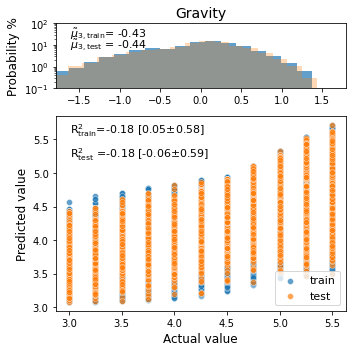

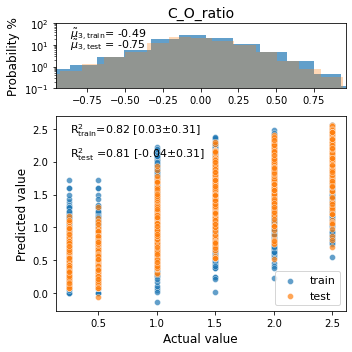

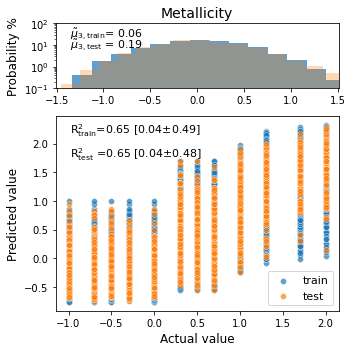

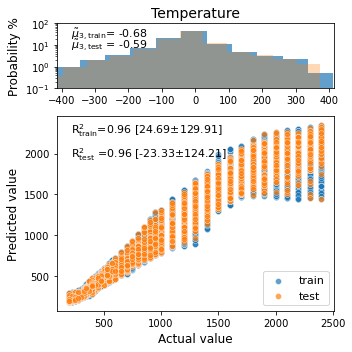

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )